In [18]:
import numpy as np
from tqdm import tqdm
import os

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K 
import math

In [19]:
train_x = []
train_y = []
eval_x = []
eval_y = []

In [20]:
csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
    for line in tqdm(f.read().splitlines()[1:]):
        emotion, pixels, usage = line.split(',')
    
        x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
        y = int(emotion)

        if usage == 'PrivateTest':
            eval_x.append(x)
            eval_y.append(y)
        else:
            train_x.append(x)
            train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:22<00:00, 1617.14it/s]

train : 32298, eval :3589


Angry


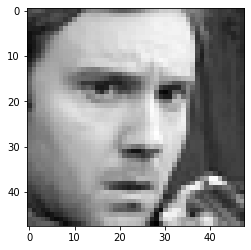

In [21]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best.h5', monitor='val_categorical_accuracy', verbose=1, mode='auto', save_best_only=True)

In [23]:
# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
hist = model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=1000,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)),
         callbacks=[mc])

Epoch 1/1000
63/64 [============================>.] - ETA: 0s - loss: 1.8287 - categorical_accuracy: 0.2451
Epoch 00001: val_categorical_accuracy improved from -inf to 0.24492, saving model to best.h5
64/64 [==============================] - 6s 97ms/step - loss: 1.8284 - categorical_accuracy: 0.2452 - val_loss: 1.9329 - val_categorical_accuracy: 0.2449
Epoch 2/1000
63/64 [============================>.] - ETA: 0s - loss: 1.6972 - categorical_accuracy: 0.3162
Epoch 00002: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 87ms/step - loss: 1.6971 - categorical_accuracy: 0.3164 - val_loss: 1.9237 - val_categorical_accuracy: 0.2449
Epoch 3/1000
63/64 [============================>.] - ETA: 0s - loss: 1.5797 - categorical_accuracy: 0.3833
Epoch 00003: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 88ms/step - loss: 1.5797 - categorical_accuracy: 0.3833 - val_loss: 1.9170 - val_categorical_accu

Epoch 26/1000
63/64 [============================>.] - ETA: 0s - loss: 0.3809 - categorical_accuracy: 0.8645
Epoch 00026: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 89ms/step - loss: 0.3808 - categorical_accuracy: 0.8646 - val_loss: 2.0081 - val_categorical_accuracy: 0.1655
Epoch 27/1000
63/64 [============================>.] - ETA: 0s - loss: 0.3196 - categorical_accuracy: 0.8860
Epoch 00027: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 88ms/step - loss: 0.3199 - categorical_accuracy: 0.8859 - val_loss: 2.0149 - val_categorical_accuracy: 0.1655
Epoch 28/1000
63/64 [============================>.] - ETA: 0s - loss: 0.3643 - categorical_accuracy: 0.8702
Epoch 00028: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 89ms/step - loss: 0.3646 - categorical_accuracy: 0.8701 - val_loss: 2.0420 - val_categorical_accuracy: 0.1655
Epoch 29/1

Epoch 51/1000
63/64 [============================>.] - ETA: 0s - loss: 0.1596 - categorical_accuracy: 0.9445
Epoch 00051: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 88ms/step - loss: 0.1596 - categorical_accuracy: 0.9445 - val_loss: 2.1510 - val_categorical_accuracy: 0.1655
Epoch 52/1000
63/64 [============================>.] - ETA: 0s - loss: 0.1101 - categorical_accuracy: 0.9622
Epoch 00052: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 88ms/step - loss: 0.1100 - categorical_accuracy: 0.9622 - val_loss: 2.2419 - val_categorical_accuracy: 0.1655
Epoch 53/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0987 - categorical_accuracy: 0.9667
Epoch 00053: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 88ms/step - loss: 0.0988 - categorical_accuracy: 0.9667 - val_loss: 2.1966 - val_categorical_accuracy: 0.1655
Epoch 54/1

64/64 [==============================] - 6s 99ms/step - loss: 0.0960 - categorical_accuracy: 0.9670 - val_loss: 3.2031 - val_categorical_accuracy: 0.3388
Epoch 76/1000
63/64 [============================>.] - ETA: 0s - loss: 0.1161 - categorical_accuracy: 0.9593
Epoch 00076: val_categorical_accuracy did not improve from 0.33881
64/64 [==============================] - 6s 88ms/step - loss: 0.1161 - categorical_accuracy: 0.9593 - val_loss: 3.2061 - val_categorical_accuracy: 0.3207
Epoch 77/1000
63/64 [============================>.] - ETA: 0s - loss: 0.1040 - categorical_accuracy: 0.9644
Epoch 00077: val_categorical_accuracy did not improve from 0.33881
64/64 [==============================] - 6s 87ms/step - loss: 0.1043 - categorical_accuracy: 0.9644 - val_loss: 3.2024 - val_categorical_accuracy: 0.3349
Epoch 78/1000
63/64 [============================>.] - ETA: 0s - loss: 0.1348 - categorical_accuracy: 0.9532
Epoch 00078: val_categorical_accuracy did not improve from 0.33881
64/64 [===

Epoch 100/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0780 - categorical_accuracy: 0.9727
Epoch 00100: val_categorical_accuracy did not improve from 0.43856
64/64 [==============================] - 6s 86ms/step - loss: 0.0780 - categorical_accuracy: 0.9727 - val_loss: 5.4284 - val_categorical_accuracy: 0.4082
Epoch 101/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0816 - categorical_accuracy: 0.9711
Epoch 00101: val_categorical_accuracy improved from 0.43856 to 0.45026, saving model to best.h5
64/64 [==============================] - 6s 91ms/step - loss: 0.0820 - categorical_accuracy: 0.9710 - val_loss: 4.9952 - val_categorical_accuracy: 0.4503
Epoch 102/1000
63/64 [============================>.] - ETA: 0s - loss: 0.1591 - categorical_accuracy: 0.9437
Epoch 00102: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 88ms/step - loss: 0.1592 - categorical_accuracy: 0.9436 - val_loss: 5.0302 - val_categor

Epoch 125/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0485 - categorical_accuracy: 0.9830
Epoch 00125: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 86ms/step - loss: 0.0489 - categorical_accuracy: 0.9829 - val_loss: 5.0645 - val_categorical_accuracy: 0.4110
Epoch 126/1000
63/64 [============================>.] - ETA: 0s - loss: 0.1430 - categorical_accuracy: 0.9493
Epoch 00126: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 5s 86ms/step - loss: 0.1431 - categorical_accuracy: 0.9493 - val_loss: 6.0451 - val_categorical_accuracy: 0.4062
Epoch 127/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0988 - categorical_accuracy: 0.9663
Epoch 00127: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 86ms/step - loss: 0.0990 - categorical_accuracy: 0.9662 - val_loss: 5.8403 - val_categorical_accuracy: 0.3831
Epoch 1

Epoch 150/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0916 - categorical_accuracy: 0.9681
Epoch 00150: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 90ms/step - loss: 0.0917 - categorical_accuracy: 0.9680 - val_loss: 5.5141 - val_categorical_accuracy: 0.4071
Epoch 151/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0880 - categorical_accuracy: 0.9691
Epoch 00151: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 86ms/step - loss: 0.0880 - categorical_accuracy: 0.9691 - val_loss: 5.6761 - val_categorical_accuracy: 0.3965
Epoch 152/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0530 - categorical_accuracy: 0.9816
Epoch 00152: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 5s 84ms/step - loss: 0.0530 - categorical_accuracy: 0.9815 - val_loss: 5.6056 - val_categorical_accuracy: 0.4166
Epoch 1

Epoch 175/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0894 - categorical_accuracy: 0.9696
Epoch 00175: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 87ms/step - loss: 0.0893 - categorical_accuracy: 0.9696 - val_loss: 5.2330 - val_categorical_accuracy: 0.4177
Epoch 176/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0484 - categorical_accuracy: 0.9824
Epoch 00176: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 87ms/step - loss: 0.0487 - categorical_accuracy: 0.9823 - val_loss: 5.4048 - val_categorical_accuracy: 0.4040
Epoch 177/1000
63/64 [============================>.] - ETA: 0s - loss: 0.1219 - categorical_accuracy: 0.9580
Epoch 00177: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 86ms/step - loss: 0.1220 - categorical_accuracy: 0.9579 - val_loss: 5.1946 - val_categorical_accuracy: 0.4235
Epoch 1

Epoch 200/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0304 - categorical_accuracy: 0.9885
Epoch 00200: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 94ms/step - loss: 0.0305 - categorical_accuracy: 0.9885 - val_loss: 5.0534 - val_categorical_accuracy: 0.4210
Epoch 201/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0794 - categorical_accuracy: 0.9728
Epoch 00201: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 95ms/step - loss: 0.0797 - categorical_accuracy: 0.9726 - val_loss: 4.7586 - val_categorical_accuracy: 0.4193
Epoch 202/1000
63/64 [============================>.] - ETA: 0s - loss: 0.1242 - categorical_accuracy: 0.9586
Epoch 00202: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 93ms/step - loss: 0.1243 - categorical_accuracy: 0.9586 - val_loss: 5.1812 - val_categorical_accuracy: 0.4213
Epoch 2

Epoch 225/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0815 - categorical_accuracy: 0.9714
Epoch 00225: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 92ms/step - loss: 0.0816 - categorical_accuracy: 0.9713 - val_loss: 4.9963 - val_categorical_accuracy: 0.4221
Epoch 226/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0865 - categorical_accuracy: 0.9705
Epoch 00226: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 92ms/step - loss: 0.0864 - categorical_accuracy: 0.9706 - val_loss: 5.4134 - val_categorical_accuracy: 0.4090
Epoch 227/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0199 - categorical_accuracy: 0.9929
Epoch 00227: val_categorical_accuracy did not improve from 0.45026
64/64 [==============================] - 6s 92ms/step - loss: 0.0200 - categorical_accuracy: 0.9928 - val_loss: 5.1359 - val_categorical_accuracy: 0.4246
Epoch 2

Epoch 250/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0443 - categorical_accuracy: 0.9834
Epoch 00250: val_categorical_accuracy did not improve from 0.45834
64/64 [==============================] - 6s 92ms/step - loss: 0.0445 - categorical_accuracy: 0.9833 - val_loss: 4.7312 - val_categorical_accuracy: 0.4472
Epoch 251/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0984 - categorical_accuracy: 0.9663
Epoch 00251: val_categorical_accuracy did not improve from 0.45834
64/64 [==============================] - 6s 92ms/step - loss: 0.0985 - categorical_accuracy: 0.9663 - val_loss: 4.6394 - val_categorical_accuracy: 0.4182
Epoch 252/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0607 - categorical_accuracy: 0.9790
Epoch 00252: val_categorical_accuracy did not improve from 0.45834
64/64 [==============================] - 6s 92ms/step - loss: 0.0606 - categorical_accuracy: 0.9790 - val_loss: 4.9770 - val_categorical_accuracy: 0.4564
Epoch 2

Epoch 275/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0286 - categorical_accuracy: 0.9894
Epoch 00275: val_categorical_accuracy did not improve from 0.45918
64/64 [==============================] - 6s 91ms/step - loss: 0.0287 - categorical_accuracy: 0.9893 - val_loss: 5.0625 - val_categorical_accuracy: 0.4369
Epoch 276/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0484 - categorical_accuracy: 0.9823
Epoch 00276: val_categorical_accuracy did not improve from 0.45918
64/64 [==============================] - 6s 91ms/step - loss: 0.0483 - categorical_accuracy: 0.9823 - val_loss: 5.1192 - val_categorical_accuracy: 0.4447
Epoch 277/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0226 - categorical_accuracy: 0.9916
Epoch 00277: val_categorical_accuracy did not improve from 0.45918
64/64 [==============================] - 6s 91ms/step - loss: 0.0226 - categorical_accuracy: 0.9916 - val_loss: 4.9517 - val_categorical_accuracy: 0.4413
Epoch 2

Epoch 300/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0228 - categorical_accuracy: 0.9919
Epoch 00300: val_categorical_accuracy did not improve from 0.45918
64/64 [==============================] - 6s 91ms/step - loss: 0.0229 - categorical_accuracy: 0.9918 - val_loss: 4.8412 - val_categorical_accuracy: 0.4472
Epoch 301/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0575 - categorical_accuracy: 0.9808
Epoch 00301: val_categorical_accuracy did not improve from 0.45918
64/64 [==============================] - 6s 91ms/step - loss: 0.0575 - categorical_accuracy: 0.9808 - val_loss: 4.6907 - val_categorical_accuracy: 0.4394
Epoch 302/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0510 - categorical_accuracy: 0.9820
Epoch 00302: val_categorical_accuracy did not improve from 0.45918
64/64 [==============================] - 6s 91ms/step - loss: 0.0510 - categorical_accuracy: 0.9820 - val_loss: 4.5889 - val_categorical_accuracy: 0.4316
Epoch 3

Epoch 325/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0248 - categorical_accuracy: 0.9913
Epoch 00325: val_categorical_accuracy did not improve from 0.47116
64/64 [==============================] - 6s 92ms/step - loss: 0.0253 - categorical_accuracy: 0.9911 - val_loss: 4.7383 - val_categorical_accuracy: 0.4575
Epoch 326/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0734 - categorical_accuracy: 0.9744
Epoch 00326: val_categorical_accuracy did not improve from 0.47116
64/64 [==============================] - 6s 92ms/step - loss: 0.0734 - categorical_accuracy: 0.9744 - val_loss: 4.9061 - val_categorical_accuracy: 0.4455
Epoch 327/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0259 - categorical_accuracy: 0.9908
Epoch 00327: val_categorical_accuracy did not improve from 0.47116
64/64 [==============================] - 6s 92ms/step - loss: 0.0260 - categorical_accuracy: 0.9907 - val_loss: 4.6068 - val_categorical_accuracy: 0.4514
Epoch 3

Epoch 350/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0469 - categorical_accuracy: 0.9830
Epoch 00350: val_categorical_accuracy did not improve from 0.47116
64/64 [==============================] - 6s 91ms/step - loss: 0.0469 - categorical_accuracy: 0.9830 - val_loss: 4.4248 - val_categorical_accuracy: 0.4547
Epoch 351/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0149 - categorical_accuracy: 0.9945
Epoch 00351: val_categorical_accuracy did not improve from 0.47116
64/64 [==============================] - 6s 92ms/step - loss: 0.0150 - categorical_accuracy: 0.9945 - val_loss: 4.4068 - val_categorical_accuracy: 0.4578
Epoch 352/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0278 - categorical_accuracy: 0.9896
Epoch 00352: val_categorical_accuracy did not improve from 0.47116
64/64 [==============================] - 6s 92ms/step - loss: 0.0278 - categorical_accuracy: 0.9896 - val_loss: 4.6945 - val_categorical_accuracy: 0.4572
Epoch 3

Epoch 375/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0415 - categorical_accuracy: 0.9854
Epoch 00375: val_categorical_accuracy did not improve from 0.47395
64/64 [==============================] - 6s 91ms/step - loss: 0.0416 - categorical_accuracy: 0.9853 - val_loss: 4.6167 - val_categorical_accuracy: 0.4673
Epoch 376/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0859 - categorical_accuracy: 0.9695
Epoch 00376: val_categorical_accuracy did not improve from 0.47395
64/64 [==============================] - 6s 91ms/step - loss: 0.0861 - categorical_accuracy: 0.9695 - val_loss: 4.5967 - val_categorical_accuracy: 0.4687
Epoch 377/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0557 - categorical_accuracy: 0.9800
Epoch 00377: val_categorical_accuracy did not improve from 0.47395
64/64 [==============================] - 6s 91ms/step - loss: 0.0558 - categorical_accuracy: 0.9800 - val_loss: 4.4933 - val_categorical_accuracy: 0.4737
Epoch 3

63/64 [============================>.] - ETA: 0s - loss: 0.0359 - categorical_accuracy: 0.9869
Epoch 00399: val_categorical_accuracy did not improve from 0.49652
64/64 [==============================] - 6s 91ms/step - loss: 0.0359 - categorical_accuracy: 0.9869 - val_loss: 4.6965 - val_categorical_accuracy: 0.4606
Epoch 400/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0214 - categorical_accuracy: 0.9922
Epoch 00400: val_categorical_accuracy did not improve from 0.49652
64/64 [==============================] - 6s 91ms/step - loss: 0.0214 - categorical_accuracy: 0.9921 - val_loss: 4.8149 - val_categorical_accuracy: 0.4589
Epoch 401/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0550 - categorical_accuracy: 0.9810
Epoch 00401: val_categorical_accuracy did not improve from 0.49652
64/64 [==============================] - 6s 91ms/step - loss: 0.0552 - categorical_accuracy: 0.9810 - val_loss: 4.5073 - val_categorical_accuracy: 0.4765
Epoch 402/1000
63/64 [

Epoch 424/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0546 - categorical_accuracy: 0.9795
Epoch 00424: val_categorical_accuracy did not improve from 0.49652
64/64 [==============================] - 6s 92ms/step - loss: 0.0546 - categorical_accuracy: 0.9795 - val_loss: 4.3090 - val_categorical_accuracy: 0.4720
Epoch 425/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0192 - categorical_accuracy: 0.9936
Epoch 00425: val_categorical_accuracy did not improve from 0.49652
64/64 [==============================] - 6s 92ms/step - loss: 0.0192 - categorical_accuracy: 0.9936 - val_loss: 4.3106 - val_categorical_accuracy: 0.4634
Epoch 426/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0071 - categorical_accuracy: 0.9971
Epoch 00426: val_categorical_accuracy did not improve from 0.49652
64/64 [==============================] - 6s 91ms/step - loss: 0.0072 - categorical_accuracy: 0.9972 - val_loss: 4.3761 - val_categorical_accuracy: 0.4712
Epoch 4

Epoch 449/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0067 - categorical_accuracy: 0.9969
Epoch 00449: val_categorical_accuracy did not improve from 0.49652
64/64 [==============================] - 6s 91ms/step - loss: 0.0067 - categorical_accuracy: 0.9969 - val_loss: 4.6910 - val_categorical_accuracy: 0.4823
Epoch 450/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0051 - categorical_accuracy: 0.9975
Epoch 00450: val_categorical_accuracy did not improve from 0.49652
64/64 [==============================] - 6s 91ms/step - loss: 0.0051 - categorical_accuracy: 0.9975 - val_loss: 4.6986 - val_categorical_accuracy: 0.4884
Epoch 451/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0042 - categorical_accuracy: 0.9975
Epoch 00451: val_categorical_accuracy did not improve from 0.49652
64/64 [==============================] - 6s 91ms/step - loss: 0.0043 - categorical_accuracy: 0.9975 - val_loss: 4.6846 - val_categorical_accuracy: 0.4940
Epoch 4

Epoch 474/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0303 - categorical_accuracy: 0.9880
Epoch 00474: val_categorical_accuracy did not improve from 0.50293
64/64 [==============================] - 6s 92ms/step - loss: 0.0303 - categorical_accuracy: 0.9880 - val_loss: 4.4816 - val_categorical_accuracy: 0.4570
Epoch 475/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0264 - categorical_accuracy: 0.9902
Epoch 00475: val_categorical_accuracy did not improve from 0.50293
64/64 [==============================] - 6s 91ms/step - loss: 0.0264 - categorical_accuracy: 0.9902 - val_loss: 4.6293 - val_categorical_accuracy: 0.4550
Epoch 476/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0265 - categorical_accuracy: 0.9900
Epoch 00476: val_categorical_accuracy did not improve from 0.50293
64/64 [==============================] - 6s 91ms/step - loss: 0.0264 - categorical_accuracy: 0.9901 - val_loss: 4.3776 - val_categorical_accuracy: 0.4770
Epoch 4

Epoch 499/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0318 - categorical_accuracy: 0.9888
Epoch 00499: val_categorical_accuracy did not improve from 0.50293
64/64 [==============================] - 6s 92ms/step - loss: 0.0318 - categorical_accuracy: 0.9888 - val_loss: 4.1852 - val_categorical_accuracy: 0.4923
Epoch 500/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0131 - categorical_accuracy: 0.9948
Epoch 00500: val_categorical_accuracy did not improve from 0.50293
64/64 [==============================] - 6s 94ms/step - loss: 0.0131 - categorical_accuracy: 0.9948 - val_loss: 4.3324 - val_categorical_accuracy: 0.4781
Epoch 501/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0069 - categorical_accuracy: 0.9971
Epoch 00501: val_categorical_accuracy did not improve from 0.50293
64/64 [==============================] - 6s 92ms/step - loss: 0.0069 - categorical_accuracy: 0.9971 - val_loss: 4.2942 - val_categorical_accuracy: 0.4765
Epoch 5

Epoch 524/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0149 - categorical_accuracy: 0.9939
Epoch 00524: val_categorical_accuracy did not improve from 0.50293
64/64 [==============================] - 6s 91ms/step - loss: 0.0149 - categorical_accuracy: 0.9939 - val_loss: 4.6423 - val_categorical_accuracy: 0.4840
Epoch 525/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0077 - categorical_accuracy: 0.9966
Epoch 00525: val_categorical_accuracy did not improve from 0.50293
64/64 [==============================] - 6s 92ms/step - loss: 0.0077 - categorical_accuracy: 0.9966 - val_loss: 4.5528 - val_categorical_accuracy: 0.4901
Epoch 526/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0057 - categorical_accuracy: 0.9972
Epoch 00526: val_categorical_accuracy did not improve from 0.50293
64/64 [==============================] - 6s 91ms/step - loss: 0.0057 - categorical_accuracy: 0.9972 - val_loss: 4.5663 - val_categorical_accuracy: 0.4907
Epoch 5

Epoch 549/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0040 - categorical_accuracy: 0.9977
Epoch 00549: val_categorical_accuracy did not improve from 0.50711
64/64 [==============================] - 6s 91ms/step - loss: 0.0041 - categorical_accuracy: 0.9976 - val_loss: 4.4383 - val_categorical_accuracy: 0.5043
Epoch 550/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0721 - categorical_accuracy: 0.9761
Epoch 00550: val_categorical_accuracy did not improve from 0.50711
64/64 [==============================] - 6s 91ms/step - loss: 0.0720 - categorical_accuracy: 0.9761 - val_loss: 4.3428 - val_categorical_accuracy: 0.4790
Epoch 551/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0402 - categorical_accuracy: 0.9854
Epoch 00551: val_categorical_accuracy did not improve from 0.50711
64/64 [==============================] - 7s 106ms/step - loss: 0.0402 - categorical_accuracy: 0.9854 - val_loss: 4.3438 - val_categorical_accuracy: 0.4770
Epoch 

Epoch 574/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0040 - categorical_accuracy: 0.9976
Epoch 00574: val_categorical_accuracy did not improve from 0.50711
64/64 [==============================] - 6s 92ms/step - loss: 0.0040 - categorical_accuracy: 0.9976 - val_loss: 4.5957 - val_categorical_accuracy: 0.4999
Epoch 575/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0040 - categorical_accuracy: 0.9977
Epoch 00575: val_categorical_accuracy did not improve from 0.50711
64/64 [==============================] - 6s 91ms/step - loss: 0.0040 - categorical_accuracy: 0.9977 - val_loss: 4.5907 - val_categorical_accuracy: 0.4987
Epoch 576/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0051 - categorical_accuracy: 0.9973
Epoch 00576: val_categorical_accuracy did not improve from 0.50711
64/64 [==============================] - 6s 91ms/step - loss: 0.0051 - categorical_accuracy: 0.9973 - val_loss: 4.5988 - val_categorical_accuracy: 0.4935
Epoch 5

Epoch 599/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0246 - categorical_accuracy: 0.9910
Epoch 00599: val_categorical_accuracy did not improve from 0.50711
64/64 [==============================] - 6s 93ms/step - loss: 0.0246 - categorical_accuracy: 0.9911 - val_loss: 4.4134 - val_categorical_accuracy: 0.4851
Epoch 600/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0091 - categorical_accuracy: 0.9965
Epoch 00600: val_categorical_accuracy did not improve from 0.50711
64/64 [==============================] - 6s 91ms/step - loss: 0.0091 - categorical_accuracy: 0.9965 - val_loss: 4.4059 - val_categorical_accuracy: 0.5013
Epoch 601/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0054 - categorical_accuracy: 0.9972
Epoch 00601: val_categorical_accuracy did not improve from 0.50711
64/64 [==============================] - 6s 91ms/step - loss: 0.0054 - categorical_accuracy: 0.9972 - val_loss: 4.4285 - val_categorical_accuracy: 0.4918
Epoch 6

Epoch 624/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0141 - categorical_accuracy: 0.9952
Epoch 00624: val_categorical_accuracy did not improve from 0.50711
64/64 [==============================] - 6s 91ms/step - loss: 0.0140 - categorical_accuracy: 0.9952 - val_loss: 4.3633 - val_categorical_accuracy: 0.5007
Epoch 625/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0069 - categorical_accuracy: 0.9971
Epoch 00625: val_categorical_accuracy improved from 0.50711 to 0.51212, saving model to best.h5
64/64 [==============================] - 6s 96ms/step - loss: 0.0071 - categorical_accuracy: 0.9971 - val_loss: 4.3964 - val_categorical_accuracy: 0.5121
Epoch 626/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0214 - categorical_accuracy: 0.9922
Epoch 00626: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 91ms/step - loss: 0.0214 - categorical_accuracy: 0.9922 - val_loss: 4.3050 - val_categor

Epoch 649/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0473 - categorical_accuracy: 0.9835
Epoch 00649: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 93ms/step - loss: 0.0474 - categorical_accuracy: 0.9834 - val_loss: 4.3558 - val_categorical_accuracy: 0.4817
Epoch 650/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0324 - categorical_accuracy: 0.9890
Epoch 00650: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 92ms/step - loss: 0.0324 - categorical_accuracy: 0.9890 - val_loss: 4.2149 - val_categorical_accuracy: 0.4862
Epoch 651/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0148 - categorical_accuracy: 0.9943
Epoch 00651: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 91ms/step - loss: 0.0148 - categorical_accuracy: 0.9943 - val_loss: 4.3745 - val_categorical_accuracy: 0.4979
Epoch 6

Epoch 674/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0279 - categorical_accuracy: 0.9897
Epoch 00674: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 91ms/step - loss: 0.0279 - categorical_accuracy: 0.9897 - val_loss: 4.5129 - val_categorical_accuracy: 0.4932
Epoch 675/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0354 - categorical_accuracy: 0.9878
Epoch 00675: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 91ms/step - loss: 0.0354 - categorical_accuracy: 0.9878 - val_loss: 4.5114 - val_categorical_accuracy: 0.4937
Epoch 676/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0395 - categorical_accuracy: 0.9861
Epoch 00676: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 91ms/step - loss: 0.0396 - categorical_accuracy: 0.9860 - val_loss: 4.3435 - val_categorical_accuracy: 0.4826
Epoch 6

Epoch 699/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0192 - categorical_accuracy: 0.9926
Epoch 00699: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 92ms/step - loss: 0.0192 - categorical_accuracy: 0.9926 - val_loss: 4.3581 - val_categorical_accuracy: 0.5001
Epoch 700/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0075 - categorical_accuracy: 0.9970
Epoch 00700: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 92ms/step - loss: 0.0075 - categorical_accuracy: 0.9970 - val_loss: 4.4974 - val_categorical_accuracy: 0.4974
Epoch 701/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0060 - categorical_accuracy: 0.9971
Epoch 00701: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 91ms/step - loss: 0.0060 - categorical_accuracy: 0.9971 - val_loss: 4.4527 - val_categorical_accuracy: 0.5013
Epoch 7

Epoch 724/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0260 - categorical_accuracy: 0.9909
Epoch 00724: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 91ms/step - loss: 0.0260 - categorical_accuracy: 0.9910 - val_loss: 4.6396 - val_categorical_accuracy: 0.4778
Epoch 725/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0160 - categorical_accuracy: 0.9946
Epoch 00725: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 91ms/step - loss: 0.0160 - categorical_accuracy: 0.9946 - val_loss: 4.5846 - val_categorical_accuracy: 0.4854
Epoch 726/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0099 - categorical_accuracy: 0.9958
Epoch 00726: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 92ms/step - loss: 0.0103 - categorical_accuracy: 0.9958 - val_loss: 4.6189 - val_categorical_accuracy: 0.4898
Epoch 7

Epoch 749/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0160 - categorical_accuracy: 0.9941
Epoch 00749: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 92ms/step - loss: 0.0160 - categorical_accuracy: 0.9941 - val_loss: 4.5699 - val_categorical_accuracy: 0.4957
Epoch 750/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0220 - categorical_accuracy: 0.9915
Epoch 00750: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 93ms/step - loss: 0.0222 - categorical_accuracy: 0.9914 - val_loss: 4.5920 - val_categorical_accuracy: 0.4915
Epoch 751/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0707 - categorical_accuracy: 0.9756
Epoch 00751: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 92ms/step - loss: 0.0707 - categorical_accuracy: 0.9756 - val_loss: 4.4133 - val_categorical_accuracy: 0.4823
Epoch 7

Epoch 774/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0039 - categorical_accuracy: 0.9977
Epoch 00774: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 6s 101ms/step - loss: 0.0039 - categorical_accuracy: 0.9977 - val_loss: 4.5670 - val_categorical_accuracy: 0.4985
Epoch 775/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0058 - categorical_accuracy: 0.9973
Epoch 00775: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 7s 103ms/step - loss: 0.0058 - categorical_accuracy: 0.9972 - val_loss: 4.6617 - val_categorical_accuracy: 0.4915
Epoch 776/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0069 - categorical_accuracy: 0.9968
Epoch 00776: val_categorical_accuracy did not improve from 0.51212
64/64 [==============================] - 7s 102ms/step - loss: 0.0069 - categorical_accuracy: 0.9968 - val_loss: 4.5751 - val_categorical_accuracy: 0.5035
Epoc

Epoch 799/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0039 - categorical_accuracy: 0.9975
Epoch 00799: val_categorical_accuracy did not improve from 0.51741
64/64 [==============================] - 6s 92ms/step - loss: 0.0039 - categorical_accuracy: 0.9975 - val_loss: 4.6909 - val_categorical_accuracy: 0.5166
Epoch 800/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0133 - categorical_accuracy: 0.9949
Epoch 00800: val_categorical_accuracy did not improve from 0.51741
64/64 [==============================] - 6s 91ms/step - loss: 0.0135 - categorical_accuracy: 0.9948 - val_loss: 4.8145 - val_categorical_accuracy: 0.5032
Epoch 801/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0949 - categorical_accuracy: 0.9695
Epoch 00801: val_categorical_accuracy did not improve from 0.51741
64/64 [==============================] - 6s 92ms/step - loss: 0.0950 - categorical_accuracy: 0.9695 - val_loss: 4.0307 - val_categorical_accuracy: 0.4990
Epoch 8

Epoch 824/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0230 - categorical_accuracy: 0.9917
Epoch 00824: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 95ms/step - loss: 0.0230 - categorical_accuracy: 0.9917 - val_loss: 4.2803 - val_categorical_accuracy: 0.4912
Epoch 825/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0078 - categorical_accuracy: 0.9969
Epoch 00825: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 90ms/step - loss: 0.0079 - categorical_accuracy: 0.9969 - val_loss: 4.3501 - val_categorical_accuracy: 0.4929
Epoch 826/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0085 - categorical_accuracy: 0.9967
Epoch 00826: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 88ms/step - loss: 0.0085 - categorical_accuracy: 0.9967 - val_loss: 4.4934 - val_categorical_accuracy: 0.4948
Epoch 8

Epoch 849/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0072 - categorical_accuracy: 0.9966
Epoch 00849: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 93ms/step - loss: 0.0073 - categorical_accuracy: 0.9965 - val_loss: 4.7001 - val_categorical_accuracy: 0.5046
Epoch 850/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0110 - categorical_accuracy: 0.9955
Epoch 00850: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 87ms/step - loss: 0.0112 - categorical_accuracy: 0.9955 - val_loss: 5.0096 - val_categorical_accuracy: 0.4935
Epoch 851/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0704 - categorical_accuracy: 0.9780
Epoch 00851: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 92ms/step - loss: 0.0704 - categorical_accuracy: 0.9780 - val_loss: 4.4387 - val_categorical_accuracy: 0.4962
Epoch 8

Epoch 874/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0069 - categorical_accuracy: 0.9971
Epoch 00874: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 99ms/step - loss: 0.0069 - categorical_accuracy: 0.9971 - val_loss: 4.3549 - val_categorical_accuracy: 0.5079
Epoch 875/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0045 - categorical_accuracy: 0.9975
Epoch 00875: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 7s 104ms/step - loss: 0.0047 - categorical_accuracy: 0.9975 - val_loss: 4.4162 - val_categorical_accuracy: 0.5102
Epoch 876/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0231 - categorical_accuracy: 0.9925
Epoch 00876: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 7s 103ms/step - loss: 0.0232 - categorical_accuracy: 0.9925 - val_loss: 4.3142 - val_categorical_accuracy: 0.5057
Epoch

Epoch 899/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0351 - categorical_accuracy: 0.9881
Epoch 00899: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 100ms/step - loss: 0.0351 - categorical_accuracy: 0.9881 - val_loss: 4.3487 - val_categorical_accuracy: 0.4907
Epoch 900/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0171 - categorical_accuracy: 0.9939
Epoch 00900: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 100ms/step - loss: 0.0170 - categorical_accuracy: 0.9939 - val_loss: 4.3431 - val_categorical_accuracy: 0.4996
Epoch 901/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0065 - categorical_accuracy: 0.9970
Epoch 00901: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 101ms/step - loss: 0.0065 - categorical_accuracy: 0.9970 - val_loss: 4.3662 - val_categorical_accuracy: 0.5013
Epoc

Epoch 924/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0041 - categorical_accuracy: 0.9976
Epoch 00924: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 96ms/step - loss: 0.0041 - categorical_accuracy: 0.9976 - val_loss: 4.3677 - val_categorical_accuracy: 0.4971
Epoch 925/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0040 - categorical_accuracy: 0.9976
Epoch 00925: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 97ms/step - loss: 0.0040 - categorical_accuracy: 0.9976 - val_loss: 4.3689 - val_categorical_accuracy: 0.5013
Epoch 926/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0044 - categorical_accuracy: 0.9974
Epoch 00926: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 95ms/step - loss: 0.0045 - categorical_accuracy: 0.9974 - val_loss: 4.3786 - val_categorical_accuracy: 0.5065
Epoch 9

Epoch 949/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0147 - categorical_accuracy: 0.9945
Epoch 00949: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 95ms/step - loss: 0.0147 - categorical_accuracy: 0.9945 - val_loss: 4.3781 - val_categorical_accuracy: 0.4820
Epoch 950/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0138 - categorical_accuracy: 0.9945
Epoch 00950: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 94ms/step - loss: 0.0138 - categorical_accuracy: 0.9945 - val_loss: 4.3186 - val_categorical_accuracy: 0.4868
Epoch 951/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0062 - categorical_accuracy: 0.9971
Epoch 00951: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 94ms/step - loss: 0.0062 - categorical_accuracy: 0.9972 - val_loss: 4.3906 - val_categorical_accuracy: 0.4870
Epoch 9

Epoch 974/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0078 - categorical_accuracy: 0.9965
Epoch 00974: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 95ms/step - loss: 0.0078 - categorical_accuracy: 0.9965 - val_loss: 4.4048 - val_categorical_accuracy: 0.4979
Epoch 975/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0055 - categorical_accuracy: 0.9975
Epoch 00975: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 97ms/step - loss: 0.0055 - categorical_accuracy: 0.9974 - val_loss: 4.4061 - val_categorical_accuracy: 0.4965
Epoch 976/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0106 - categorical_accuracy: 0.9956
Epoch 00976: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 96ms/step - loss: 0.0106 - categorical_accuracy: 0.9956 - val_loss: 4.4040 - val_categorical_accuracy: 0.4976
Epoch 9

Epoch 999/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0040 - categorical_accuracy: 0.9978
Epoch 00999: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 95ms/step - loss: 0.0040 - categorical_accuracy: 0.9978 - val_loss: 4.4075 - val_categorical_accuracy: 0.5018
Epoch 1000/1000
63/64 [============================>.] - ETA: 0s - loss: 0.0040 - categorical_accuracy: 0.9976
Epoch 01000: val_categorical_accuracy did not improve from 0.52132
64/64 [==============================] - 6s 95ms/step - loss: 0.0040 - categorical_accuracy: 0.9976 - val_loss: 4.4153 - val_categorical_accuracy: 0.5029


In [24]:
import os
model_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/model.h5'
model.save(model_path)

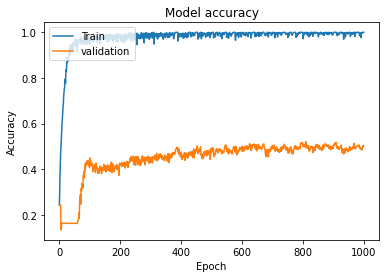

In [25]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [26]:
import os
os.path.exists('best.h5')

True